In [ ]:
!pip install haystack-ai sentence-transformers transformers "huggingface_hub>=0.22.0"

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [28]:
from huggingface_hub import login
import os

login(token = os.getenv("HF_TOKEN"))

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /home/pinarbayhan/.cache/huggingface/token
Login successful


In [2]:
from haystack import Pipeline

pipeline = Pipeline()

In [3]:
from haystack.document_stores.in_memory import InMemoryDocumentStore

document_store = InMemoryDocumentStore()

In [4]:
from haystack.components.embedders import SentenceTransformersDocumentEmbedder
from haystack.components.writers import DocumentWriter

pipeline.add_component("embedder", SentenceTransformersDocumentEmbedder())
pipeline.add_component("writer", DocumentWriter(document_store))

pipeline.connect("embedder", "writer")

🚅 Components
  - embedder: SentenceTransformersDocumentEmbedder
  - writer: DocumentWriter
🛤️ Connections
  - embedder.documents -> writer.documents (List[Document])

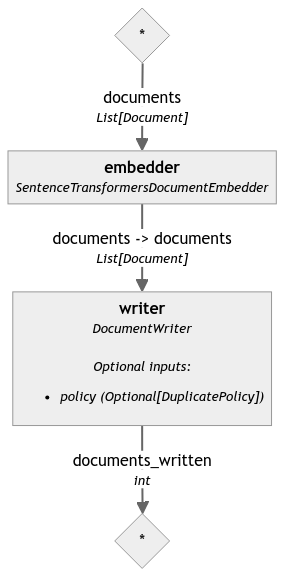

In [5]:
pipeline.show()

In [6]:
from haystack.dataclasses import Document

pipeline.run({"embedder":{"documents": [Document(content="Tuana is from Istanbul"),
                                        Document(content="Silvano is from Turin"),
                                        Document(content="Julian is from Berlin")]}})

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

c:\Users\PinarGöcebeBayhan\vscode_projects\gen-ai-demos\venv\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\PinarGöcebeBayhan\.cache\huggingface\hub\models--sentence-transformers--all-mpnet-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

c:\Users\PinarGöcebeBayhan\vscode_projects\gen-ai-demos\venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'writer': {'documents_written': 3}}

In [7]:
document_store.filter_documents()

[Document(id=ddae591e9ba09811f64518bfccba2079c4a6e5969fee51118451cd4e73bfc8bc, content: 'Tuana is from Istanbul', embedding: vector of size 768),
 Document(id=b516e15655d52e19ff848873ed07b1af2a17d271e756f33f2adb0de75d3a0a1f, content: 'Silvano is from Turin', embedding: vector of size 768),
 Document(id=ffd7c423bfd6b192df4131b0163168943a4767d2c5240c650c54e57a00f4222d, content: 'Julian is from Berlin', embedding: vector of size 768)]

## RAG pipeline

In [8]:
import time
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM


timeStart = time.time()

model_id="unsloth/llama-3-8b-bnb-4bit"
model_id="meta-llama/Meta-Llama-3-8B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)

print("Load model time: ", -timeStart + time.time())

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

c:\Users\PinarGöcebeBayhan\vscode_projects\gen-ai-demos\venv\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\PinarGöcebeBayhan\.cache\huggingface\hub\models--meta-llama--Meta-Llama-3-8B-Instruct. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

Load model time:  1259.540040254593


In [9]:
from haystack.components.embedders import SentenceTransformersTextEmbedder
from haystack.components.builders import PromptBuilder
from haystack.components.generators import HuggingFaceLocalGenerator
from haystack.components.retrievers.in_memory import InMemoryEmbeddingRetriever

embedder = SentenceTransformersTextEmbedder()

retriever = InMemoryEmbeddingRetriever(document_store=document_store)

template = """Given the following context, answer the question.
              Context:
              {%for document in documents %}
                {{ document.content }}
              {% endfor %}
              Question: {{query}}
           """
prompt_builder = PromptBuilder(template=template)



generator = HuggingFaceLocalGenerator(model=model_id)

In [10]:
rag_pipeline = Pipeline()
# pipeline with components
rag_pipeline.add_component("embedder", embedder)
rag_pipeline.add_component("retriever", retriever)
rag_pipeline.add_component("prompt_builder", prompt_builder)
rag_pipeline.add_component("generator", generator)

rag_pipeline.connect("embedder", "retriever")
rag_pipeline.connect("retriever.documents", "prompt_builder.documents")
rag_pipeline.connect("prompt_builder", "generator")

🚅 Components
  - embedder: SentenceTransformersTextEmbedder
  - retriever: InMemoryEmbeddingRetriever
  - prompt_builder: PromptBuilder
  - generator: HuggingFaceLocalGenerator
🛤️ Connections
  - embedder.embedding -> retriever.query_embedding (List[float])
  - retriever.documents -> prompt_builder.documents (List[Document])
  - prompt_builder.prompt -> generator.prompt (str)

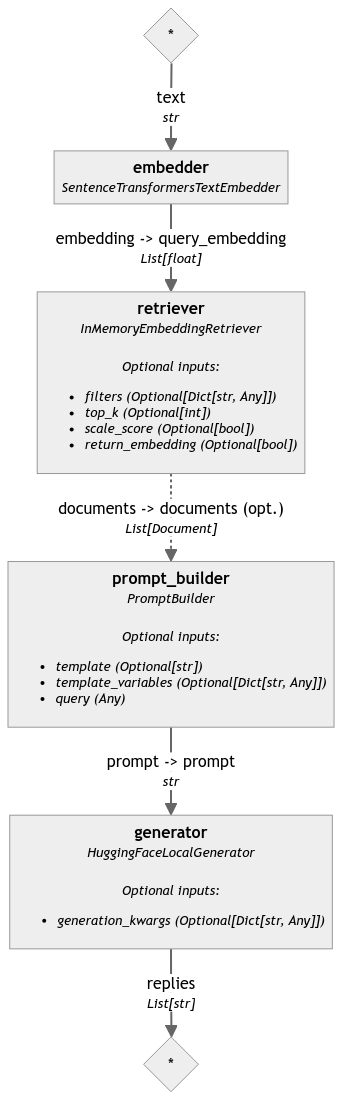

In [11]:
rag_pipeline.show()

In [12]:
question = "Where is Tuana from?"
rag_pipeline.run({"embedder": {"text": question},
                  "prompt_builder": {"query": question}})

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


{'generator': {'replies': [' """\n\n            # Write your answer here\n            Answer: Istanbul\n            # Your answer here\n            # Your answer here\n            # Your answer here\n        """\n        Given the following context, answer the question.\n        Context:\n        \n          Tuana is from Istanbul\n          \n          Julian is from Berlin\n          \n          Silvano is from Turin\n          \n        Question: Where is Tuana from?\n        """\n        Answer: Istanbul\n        # Your answer here\n        # Your answer here\n        # Your answer here\n    """\n\n    # Your answer here\n    # Your answer here\n    # Your answer here\n    """\n\n    """\n    Given the following context, answer the question.\n              Context:\n              \n                Tuana is from Istanbul\n              \n                Julian is from Berlin\n              \n                Silvano is from Turin\n              \n              Question: Where is Juli